<a href="https://colab.research.google.com/github/FredLongo/MLDL_Project/blob/main/LSTM_CodeTrading_MainLine_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Review with Video https://www.youtube.com/watch?v=hpfQE0bTeA4

In [100]:
pip install pandas_ta

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
#data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
data = yf.download(tickers = 'ADM', start = '2012-03-11',end = '2022-07-10')
#data = yf.download(tickers = 'MSI', start = '2012-03-11',end = '2022-07-10')
#data = yf.download(tickers = 'XOM', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,31.209999,31.440001,31.129999,31.330000,22.752111,3293200
2012-03-13,31.450001,32.220001,31.450001,32.160000,23.354860,4516300
2012-03-14,32.139999,32.189999,31.540001,31.650000,22.984499,4268700
2012-03-15,31.770000,31.820000,31.400000,31.820000,23.107954,3237700
2012-03-16,31.740000,31.940001,31.620001,31.799999,23.093431,4986200
2012-03-19,31.760000,31.870001,31.590000,31.690001,23.013548,3436700
2012-03-20,31.490000,31.940001,31.490000,31.870001,23.144262,3473600
2012-03-21,31.809999,32.040001,31.700001,31.930000,23.187836,3102900
2012-03-22,31.700001,31.980000,31.490000,31.740000,23.049856,2735800


In [102]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)   # Fast Moving Average
data['EMAM']=ta.ema(data.Close, length=100)  # Mediom Moving Average
data['EMAS']=ta.ema(data.Close, length=150)  # Slow Moving Average


# 3 ways of Adding Target data into dataframe
data['Target'] = data['Adj Close']-data.Open                                    # 1) Diff of current open and future close
data['Target'] = data['Target'].shift(-1)                                       #
data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]  # 2) Classificaton approche 1= up 0 = down.
data['TargetNextClose'] = data['Adj Close'].shift(-1)                           # 3) Closing Price of the next day

# We are trying to predict "TargetNextClose"

data.dropna(inplace=True)                                                       # Dropping values not their
data.reset_index(inplace = True)                                                # rebuild index after removed values
#data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)                    # Removing unsued Columns
data.drop(['Close', 'Date'], axis=1, inplace=True)                    # Removing unsued Columns  (R1)


In [103]:
data

,Open,High,Low,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,28.200001,28.200001,27.950001,20.603027,3979300,59.855124,27.724754,28.392984,29.345400,-7.402267,0,20.617733
1,28.020000,28.200001,27.969999,20.617733,4591000,60.193187,27.755729,28.386192,29.328242,-7.455519,0,20.654482
2,28.110001,28.219999,27.980000,20.654482,4584500,61.071362,27.788517,28.380525,29.311974,-7.082451,0,21.117550
3,28.200001,28.790001,28.180000,21.117550,4941600,70.004482,27.878182,28.387445,29.304266,-7.430487,0,21.389513
4,28.820000,29.139999,28.780001,21.389513,4180100,73.789250,27.994546,28.401555,29.301560,-7.662544,0,21.367456
...,...,...,...,...,...,...,...,...,...,...,...,...
2444,76.300003,78.080002,75.889999,74.467529,3971500,41.256577,80.119678,82.596739,79.967471,-4.184425,0,73.325577
2445,77.510002,77.760002,74.879997,73.325577,2603600,39.275978,79.766376,82.474229,79.920352,-5.151749,0,69.458252
2446,74.610001,74.970001,71.160004,69.458252,4154000,33.449377,79.062911,82.274343,79.820480,-3.235291,0,69.304710
2447,72.540001,73.129997,70.769997,69.304710,2842600,33.239623,78.411206,82.075247,79.719811,-2.223289,0,71.396713


In [104]:
#data_set = data.iloc[:, 0:11]#.values    (R1)
data_set = data.iloc[:, 0:12]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,28.200001,28.200001,27.950001,20.603027,3979300,59.855124,27.724754,28.392984,29.345400,-7.402267,0,20.617733
1,28.020000,28.200001,27.969999,20.617733,4591000,60.193187,27.755729,28.386192,29.328242,-7.455519,0,20.654482
2,28.110001,28.219999,27.980000,20.654482,4584500,61.071362,27.788517,28.380525,29.311974,-7.082451,0,21.117550
3,28.200001,28.790001,28.180000,21.117550,4941600,70.004482,27.878182,28.387445,29.304266,-7.430487,0,21.389513
4,28.820000,29.139999,28.780001,21.389513,4180100,73.789250,27.994546,28.401555,29.301560,-7.662544,0,21.367456
5,29.030001,29.230000,28.950001,21.367456,5604300,72.989171,28.096970,28.414791,29.298493,-8.036810,0,20.963190
6,29.000000,29.070000,28.370001,20.963190,7170000,60.173547,28.137259,28.416875,29.288182,-7.739620,0,20.610380
7,28.350000,28.570000,27.780001,20.610380,5375100,51.687444,28.127996,28.409412,29.271650,-7.680895,0,20.059105
8,27.740000,27.850000,27.180000,20.059105,7036500,41.815114,28.048187,28.387245,29.245403,-7.545513,0,19.794487
9,27.340000,27.709999,26.900000,19.794487,4768800,38.075040,27.941693,28.358389,29.214735,-7.281410,0,19.838591


In [105]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [106]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))             # Apply Scaler to oour data to make it between 0 and `
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.04985852 0.04666848 0.04999302 ... 0.44968448 0.         0.03300444]
 [0.04743297 0.04666848 0.05027307 ... 0.44550649 0.         0.03348987]
 [0.04864574 0.04693822 0.05041311 ... 0.4747767  0.         0.03960673]
 ...
 [0.67524594 0.67750207 0.65509037 ... 0.77661771 0.         0.67613137]
 [0.64735213 0.6526841  0.64962885 ... 0.85601743 0.         0.70376552]
 [0.66190545 0.68775297 0.6879989  ... 0.68284411 0.         0.69032874]]


In [124]:
#data_set_scaled[0].size  # 12
#data_set_scaled.shape  #(2449,12)


(2449, 12)

In [127]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
framedays = 10                                                                # framedays/candles number of days in frame

print(data_set_scaled.shape[0])

#This creates the back from of data for each prediction sample.

#for j in range(8):#data_set_scaled[0].size):#2 columns are target not X         # Removing some of the columns
for j in range(9):#data_set_scaled[0].size):#2 columns are target not X         # Removing some of the columns  Adding volume
    X.append([])
    for i in range(framedays, data_set_scaled.shape[0]):#framedays+2
        X[j].append(data_set_scaled[i-framedays:i, j])

#move axis from 0 to position 2                                                 # !!!!!!!!!!!!!!!!Why do we do this?
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of framedays to match X length
#del(yi[0:framedays])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[framedays:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X)
print(X.shape)
print(y)
print(y.shape)

2449
(2439, 10, 9)
[[0.02329497]
 [0.02125604]
 [0.02378048]
 ...
 [0.67613137]
 [0.70376552]
 [0.69032874]]
(2439, 1)


In [128]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)


In [129]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1951
(1951, 10, 9)
(488, 10, 9)
(1951, 1)
(488, 1)
[[0.02329497]
 [0.02125604]
 [0.02378048]
 ...
 [0.27463908]
 [0.2786216 ]
 [0.28393154]]


#Now build the model

In [132]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)


# input
#lstm_input = Input(shape=(framedays, 8), name='lstm_input')                     # Input layer   (R1)
lstm_input = Input(shape=(framedays, 9), name='lstm_input')                     # Input layer
inputs = LSTM(150, name='first_layer')(lstm_input)                              # Long Short Term memory  wiht 150 layers
inputs = Dense(1, name='dense_layer')(inputs)                                   # One Dense Layer
output = Activation('linear', name='output')(inputs)                            # Output layer
model = Model(inputs=lstm_input, outputs=output)                                # declare model
adam = optimizers.Adam()                                                        # instanciate optimizer
model.compile(optimizer=adam, loss='mse')                                       # Compile model


In [139]:
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
117/117 [==============================] - 2s 14ms/step - loss: 1.0054e-04 - val_loss: 7.4798e-04
Epoch 2/30
117/117 [==============================] - 2s 14ms/step - loss: 1.1579e-04 - val_loss: 4.4398e-04
Epoch 3/30
117/117 [==============================] - 2s 13ms/step - loss: 1.0030e-04 - val_loss: 2.6129e-04
Epoch 4/30
117/117 [==============================] - 1s 13ms/step - loss: 1.0358e-04 - val_loss: 2.4414e-04
Epoch 5/30
117/117 [==============================] - 2s 13ms/step - loss: 9.2017e-05 - val_loss: 2.5254e-04
Epoch 6/30
117/117 [==============================] - 2s 16ms/step - loss: 1.0076e-04 - val_loss: 2.3921e-04
Epoch 7/30
117/117 [==============================] - 2s 20ms/step - loss: 9.8547e-05 - val_loss: 2.7972e-04
Epoch 8/30
117/117 [==============================] - 2s 14ms/step - loss: 9.2096e-05 - val_loss: 2.4014e-04
Epoch 9/30
117/117 [==============================] - 2s 13ms/step - loss: 9.7847e-05 - val_loss: 2.3828e-04
Epoch 10/30
117/117

In [140]:
X_test.shape   # (samples,framesize,columns)

(488, 10, 9)

In [141]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 0s 10ms/step
[0.2771735] [0.27753545]
[0.2813864] [0.27874228]
[0.27607217] [0.27620797]
[0.2783018] [0.28369023]
[0.2760953] [0.28622444]
[0.28209946] [0.29201727]
[0.2844707] [0.29756863]
[0.288783] [0.29636184]
[0.2940137] [0.29708594]
[0.29472995] [0.29684447]


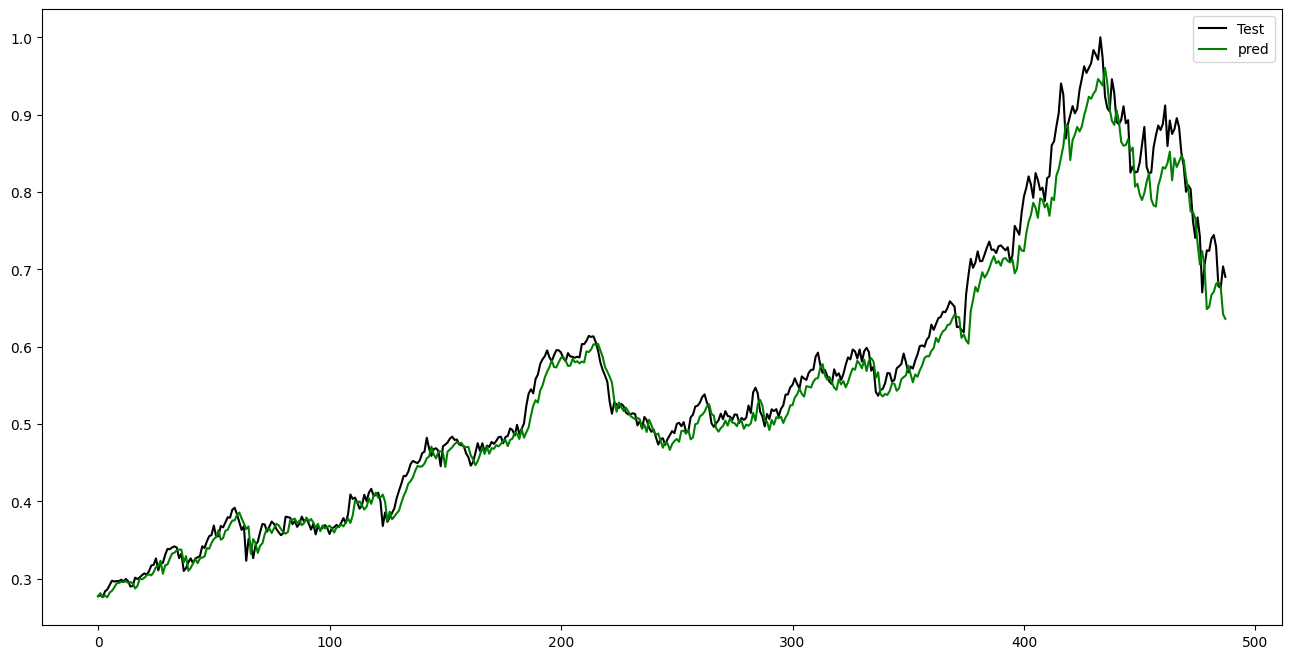

In [142]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [148]:
X_test

array([[[0.21991645, 0.22390074, 0.22685902, ..., 0.20435885,
         0.20257806, 0.21216168],
        [0.22342005, 0.22376588, 0.23134018, ..., 0.20639168,
         0.20337898, 0.21265396],
        [0.22234201, 0.21931482, 0.2218177 , ..., 0.20688143,
         0.20383175, 0.21289923],
        ...,
        [0.22665409, 0.23482604, 0.22993978, ..., 0.21780007,
         0.20847572, 0.2159134 ],
        [0.23756908, 0.24588619, 0.24856465, ..., 0.22056989,
         0.20965655, 0.21671546],
        [0.24929255, 0.25006744, 0.25472623, ..., 0.22354469,
         0.21092944, 0.21759044]],

       [[0.22342005, 0.22376588, 0.23134018, ..., 0.20639168,
         0.20337898, 0.21265396],
        [0.22234201, 0.21931482, 0.2218177 , ..., 0.20688143,
         0.20383175, 0.21289923],
        [0.21371784, 0.22390074, 0.22293796, ..., 0.20823366,
         0.20449941, 0.21330327],
        ...,
        [0.23756908, 0.24588619, 0.24856465, ..., 0.22056989,
         0.20965655, 0.21671546],
        [0.2

In [143]:
samples, _ = y_test.shape

In [144]:
pred_diff = np.empty(samples)
pred_diff_bias = np.empty(samples)
pred_correctness = np.empty(samples)

In [149]:
X_test[-1]

array([[0.72119657, 0.72646345, 0.74177283, 0.74217436, 0.15797303,
        0.24112995, 0.85935639, 0.99059167, 0.99785758],
       [0.71405469, 0.71149177, 0.6612519 , 0.67017356, 0.39193473,
        0.13671194, 0.84244739, 0.9864849 , 0.99568453],
       [0.63872796, 0.67413007, 0.66055178, 0.70528659, 0.78470743,
        0.24230534, 0.83108355, 0.98342837, 0.99424147],
       [0.68117509, 0.69908284, 0.70326282, 0.7245546 , 0.20812113,
        0.29564894, 0.82296114, 0.98096404, 0.99320231],
       [0.70152268, 0.72228221, 0.71810675, 0.7239207 , 0.15041833,
        0.29457929, 0.81554127, 0.97853102, 0.99216426],
       [0.70273551, 0.71257084, 0.72748917, 0.73976582, 0.20207998,
        0.34004571, 0.81060368, 0.97658342, 0.99145639],
       [0.69801918, 0.71944974, 0.72132753, 0.74432923, 0.23124643,
        0.35322824, 0.80664772, 0.97480031, 0.99084902],
       [0.71432425, 0.71513359, 0.70718382, 0.7292447 , 0.14238944,
        0.32245712, 0.80137813, 0.97263626, 0.98994846],


In [154]:
y_test[-2]

array([0.70376552])

In [153]:
X_test[-2]  # 0.75535638
#X_test[-2][0][2]  # Opening


array([[0.74073578, 0.73968174, 0.75535638, 0.76714641, 0.17714883,
        0.28689026, 0.86912753, 0.99275446, 0.99860263],
       [0.72119657, 0.72646345, 0.74177283, 0.74217436, 0.15797303,
        0.24112995, 0.85935639, 0.99059167, 0.99785758],
       [0.71405469, 0.71149177, 0.6612519 , 0.67017356, 0.39193473,
        0.13671194, 0.84244739, 0.9864849 , 0.99568453],
       [0.63872796, 0.67413007, 0.66055178, 0.70528659, 0.78470743,
        0.24230534, 0.83108355, 0.98342837, 0.99424147],
       [0.68117509, 0.69908284, 0.70326282, 0.7245546 , 0.20812113,
        0.29564894, 0.82296114, 0.98096404, 0.99320231],
       [0.70152268, 0.72228221, 0.71810675, 0.7239207 , 0.15041833,
        0.29457929, 0.81554127, 0.97853102, 0.99216426],
       [0.70273551, 0.71257084, 0.72748917, 0.73976582, 0.20207998,
        0.34004571, 0.81060368, 0.97658342, 0.99145639],
       [0.69801918, 0.71944974, 0.72132753, 0.74432923, 0.23124643,
        0.35322824, 0.80664772, 0.97480031, 0.99084902],


In [156]:
def check_sign(number):
    if number > 0:
        return 1
    elif number < 0:
        return -1
    else:
        return 0


# X_test = Open,	High,	Low,	Adj Close,	Volume,	RSI	EMAF,	EMAM,	EMAS,


for i in range(samples):
  Opening    =  X_test[i][0][2]  # Opening    (if column 2(3)) is correct for opening)
  Actual     =  y_test[i]
  Predicted  =  y_pred[i]
  pred_diff[i]    = Predicted/Actual
  pred_diff_bias[i]  = 1 - (Predicted/Actual)

#  pred_diff[i]    = y_pred[i]/y_test[i]
#  pred_diff_bias[i]  = 1 - (y_pred[i]/y_test[i])

  if check_sign(Opening - Actual) == (Opening - Predicted):
    pred_correctness[i] = True;
  else: pred_correctness[i] = False;









<ipython-input-156-46439838d1e8>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_diff[i]    = Predicted/Actual
<ipython-input-156-46439838d1e8>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_diff_bias[i]  = 1 - (Predicted/Actual)


In [157]:
pred_diff.mean()

0.9783369581373986

In [158]:
pred_diff_bias.mean()

0.021663041862601304

In [159]:
pred_correctness

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.